# **REPORTE 10**

Nombre: Bruno Merino

Código: 20191728

In [ ]:
pip install causalgraphicalmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Código**

Alessandra Marocho (20201319)

Bruno Merino (20191728)

## **Regresión discontinua** 

**1. Explique de manera muy breve y resumida en qué consiste una regresión discontinua.**
 
Cuando realizamos estudios cuasi - experimentales y nos encontramos interesados en conocer los efectos del mismo sobre el grupo de tratamiento, debemos tener en cuenta que no podemos utilizar la aleatorización. Ante tal ausencia, la regresión discontinua es una herramienta que nos permite advertir los efectos causales que se presentan al ubicarse entre un grupo de tratamiento.


En primer lugar, se debe identificar the running variable. Esta determina quiénes componen del grupo de tratamiento y quiénes no. Esta mantiene una estrecha relación con la variable dependiente. Asimismo, cuando empleamos una regresión discontinua también identificamos un cutoff o umbral. Este es uno de los componentes de RV y delimita a aquellos pertenecientes y no al grupo de tratamiento. Finalmente, el bandwith o el ancho de banda se trata del área dentro de RV que busca ser comparada. Se concentra alrededor del umbral.



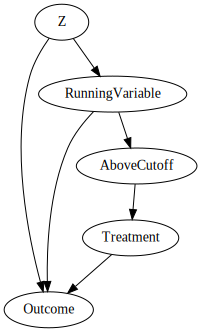

In [ ]:
sprinkler = CausalGraphicalModel(
    nodes=["RunningVariable", "AboveCutoff", "Treatment", "Z", "Outcome"],
    edges=[
        ("Z", "RunningVariable"), 
        ("RunningVariable", "AboveCutoff"), 
        ("RunningVariable", "Outcome"),
        ("AboveCutoff", "Treatment"), 
        ("Z", "Outcome"), 
        ("Treatment", "Outcome")
    ]
)

# draw return a graphviz `dot` object, which jupyter can render
sprinkler.draw()

**2. Detalle un ejemplo en la vida real en donde podría emplear una regresión discontinua.**

Se podría realizar una regresión discontinua para analizar el efecto sobre el rendimiento laboral que tendría otorgar una gratificación o un bono entre los empleados de similar rendimiento en una empresa.


**3. Explique el diseño Sharp Desing y comente un ejemplo en la vida real en donde podría aplicarlo (sea lo más detallado posible).** 

El diseño Sharp RD nos permite visibilizar la posibilidad de ser parte del grupo de tratamiento de manera precisa. Debido ello, es catalogada como una prueba determinística. Esta refleja quién pertenece al grupo de tratamiento de 0 a 1. Eso quiere decir que si uno se encuentra debajo del umbral es igual a cero, y lo contrario al estar encima del mismo. 

Siguiendo el ejemplo previamente mencionado, por medio del diseño Sharp RD es posible diferenciar entre aquellos que fueron acreedores de una gratificación laboral y aquellos empleados que no, representando a su vez si existe una diferencia en su rendimiento laboral. De esa manera, el primer grupo definido será representado por 1, mientras que el resto de empleados serán representados por medio de 0. 



## **Aplicaciones**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, warnings
import statsmodels.formula.api as smf
warnings.filterwarnings('ignore')
from causalgraphicalmodels import CausalGraphicalModel
from cProfile import label
%matplotlib inline

### **Ejemplo 1:**

$$Y = 15 + 22D + 2.5X + e $$

In [ ]:
## Random data
dat = pd.DataFrame({'x': np.random.normal(50, 25, 1000)})
dat.loc[dat.x<0, 'x'] = 0
dat = dat[dat.x<100]
dat['D'] = 0

# Cutoff
dat.loc[dat.x>50, 'D'] = 1

# Simulated Y
dat['y'] = 15 + 22*dat.D + 2.5 * dat.x + np.random.normal(0, 20, dat.shape[0])
# Not Treatment
dat_0 = dat[dat.D == 0]
# Treatment
dat_1 = dat[dat.D == 1]

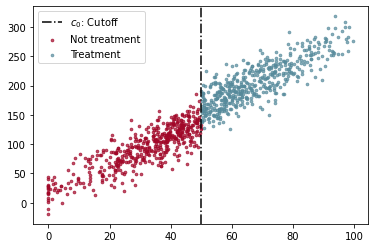

In [ ]:
# Colors 
treat_c = "#568A9B" # Treatment
n_treat = "#A10728" # Not treatment
# Plot
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .7, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .7, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")
plt.legend();

In [ ]:
def y_hat_lin(da_ta, x = "x", y = "y"):
    yhat = smf.ols(f"{y} ~ {x}", data = da_ta).fit().predict()
    da_ta["yhat"] = yhat
    da_ta.sort_values('yhat', inplace = True)
    return da_ta

data_y0 = y_hat_lin(dat_0)
data_y1 = y_hat_lin(dat_1)

[]

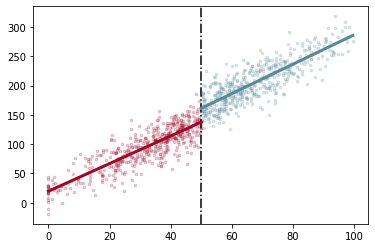

In [ ]:
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .2, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .2, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y1, color = treat_c, lw = 3);
[]

**Jump Effect**

In [ ]:
eff = min(data_y1.yhat) - max(data_y0.yhat)
eff = round(eff,  2)
print("Effect:", f"{eff}")

Effect: 23.6


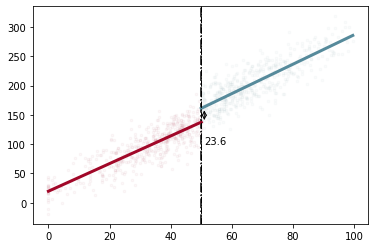

In [ ]:
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .03, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .03, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y1, color = treat_c, lw = 3)
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff", lw = 1)
plt.annotate(f"{eff}", xy = (51, eff + 76))
plt.annotate("", xy = (51, max(data_y0.yhat)), xytext = (51, min(data_y1.yhat)), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"));

Como es posible observar por medio del gráfico, para el ejemplo 1, el efecto es igual a 23.6. 

### **Ejemplo 2:** 

$$ Y = 12 + 60D + 1.3X + e $$

In [ ]:
## Random data
dat = pd.DataFrame({'x': np.random.normal(50, 25, 1000)})
dat.loc[dat.x<0, 'x'] = 0
dat = dat[dat.x<100]
dat['D'] = 0

# Cutoff
dat.loc[dat.x>50, 'D'] = 1

# Simulated Y
dat['y'] = 12 + 60*dat.D + 1.3 * dat.x + np.random.normal(0, 20, dat.shape[0])
# Not Treatment
dat_0 = dat[dat.D == 0]
# Treatment
dat_1 = dat[dat.D == 1]

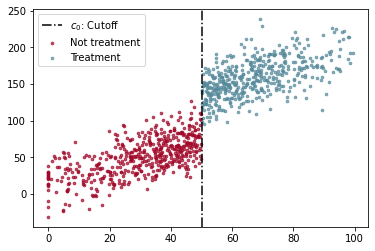

In [ ]:
# Colors 
treat_c = "#568A9B" # Treatment
n_treat = "#A10728" # Not treatment
# Plot
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .7, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .7, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")
plt.legend();

In [ ]:
def y_hat_lin(da_ta, x = "x", y = "y"):
    yhat = smf.ols(f"{y} ~ {x}", data = da_ta).fit().predict()
    da_ta["yhat"] = yhat
    da_ta.sort_values('yhat', inplace = True)
    return da_ta

data_y0 = y_hat_lin(dat_0)
data_y1 = y_hat_lin(dat_1)

[]

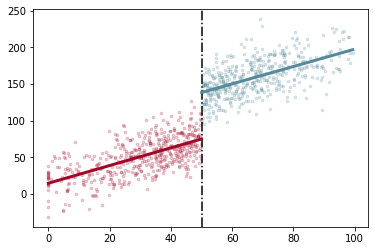

In [ ]:
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .2, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .2, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y1, color = treat_c, lw = 3);
[]

**Jump Effect**

In [ ]:
eff = min(data_y1.yhat) - max(data_y0.yhat)
eff = round(eff,  2)
print("Effect:", f"{eff}")

Effect: 63.5


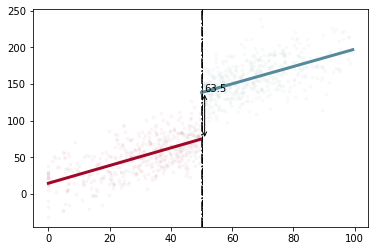

In [ ]:
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .03, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .03, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y1, color = treat_c, lw = 3)
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff", lw = 1)
plt.annotate(f"{eff}", xy = (51, eff + 76))
plt.annotate("", xy = (51, max(data_y0.yhat)), xytext = (51, min(data_y1.yhat)), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"));